In [1]:
import pandas as pd

file_path = './output/all_efficiency_data.xlsx' 
xls = pd.ExcelFile(file_path)
sheets = xls.sheet_names
df_dict = {sheet: pd.read_excel(xls, sheet_name=sheet) for sheet in sheets}
df_combined = pd.concat(df_dict.values(), ignore_index=True)
print(df_combined.head())


   Node  Knapsack Efficiency         File  SFC Efficiency  \
0     0             0.969401   2_8_output        0.998781   
1     1             0.935673   2_8_output        0.998781   
2     0             0.989076  2_16_output        0.986618   
3     1             0.982954  2_16_output        0.986618   
4     0             0.999046  2_32_output        0.996249   

   Total Knapsack Efficiency  
0                   0.934532  
1                   0.934532  
2                   0.969800  
3                   0.969800  
4                   0.991126  


In [2]:
df_combined

,Node,Knapsack Efficiency,File,SFC Efficiency,Total Knapsack Efficiency
0,0,0.969401,2_8_output,0.998781,0.934532
1,1,0.935673,2_8_output,0.998781,0.934532
2,0,0.989076,2_16_output,0.986618,0.969800
3,1,0.982954,2_16_output,0.986618,0.969800
4,0,0.999046,2_32_output,0.996249,0.991126
...,...,...,...,...,...
757,123,0.998370,128_2048_output,0.948507,0.837669
758,124,0.998059,128_2048_output,0.948507,0.837669
759,125,0.941334,128_2048_output,0.948507,0.837669
760,126,0.998933,128_2048_output,0.948507,0.837669


In [5]:
files = ['./output/2_8_output.txt', './output/2_16_output.txt','./output/2_32_output.txt',
'./output/4_16_output.txt','./output/4_32_output.txt','./output/4_64_output.txt','./output/8_32_output.txt'
,'./output/8_64_output.txt','./output/8_128_output.txt','./output/16_64_output.txt','./output/16_128_output.txt'
,'./output/16_256_output.txt','./output/32_128_output.txt','./output/32_256_output.txt','./output/32_512_output.txt',
'./output/64_256_output.txt','./output/64_512_output.txt','./output/64_1024_output.txt','./output/128_512_output.txt',
'./output/128_1024_output.txt','./output/128_2048_output.txt']  


In [9]:
def separate_dataframes_by_file(df):
    df.sort_values(by=['File', 'Node'], inplace=True)
    unique_files = df['File'].unique()
    dfs = {}
    
    for file in unique_files:
        dfs[file] = df[df['File'] == file]
    
    return dfs
dfs_by_file = separate_dataframes_by_file(df_combined)
print(dfs_by_file.keys())  
print(dfs_by_file['2_8_output'].head())


dict_keys(['128_1024_output', '128_2048_output', '128_512_output', '16_128_output', '16_256_output', '16_64_output', '2_16_output', '2_32_output', '2_8_output', '32_128_output', '32_256_output', '32_512_output', '4_16_output', '4_32_output', '4_64_output', '64_1024_output', '64_256_output', '64_512_output', '8_128_output', '8_32_output', '8_64_output'])
   Node  Knapsack Efficiency        File  SFC Efficiency  \
0     0             0.969401  2_8_output        0.998781   
1     1             0.935673  2_8_output        0.998781   

   Total Knapsack Efficiency  
0                   0.934532  
1                   0.934532  


In [11]:
dfs_by_file['2_8_output']

,Node,Knapsack Efficiency,File,SFC Efficiency,Total Knapsack Efficiency
0,0,0.969401,2_8_output,0.998781,0.934532
1,1,0.935673,2_8_output,0.998781,0.934532


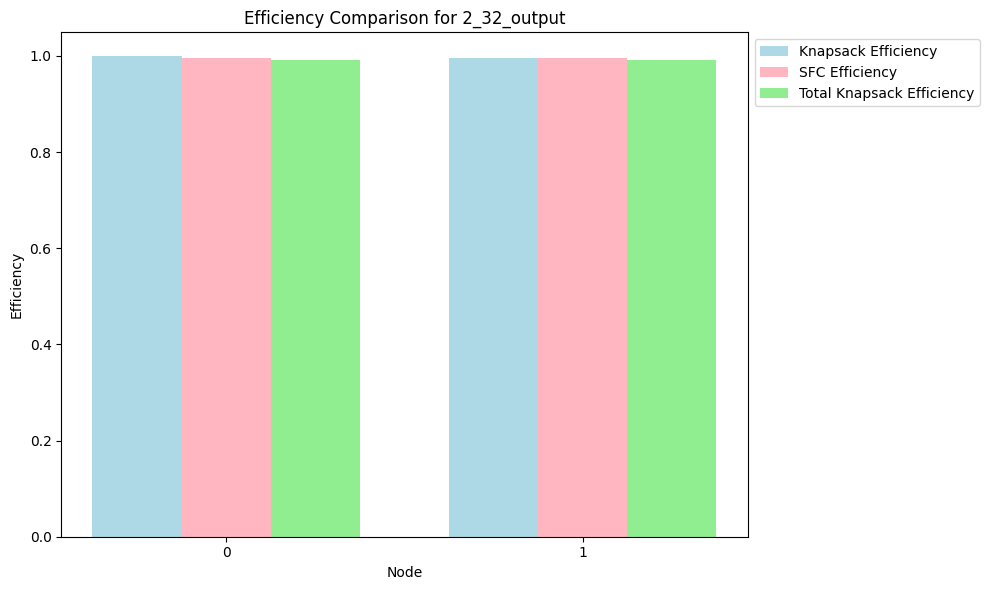

In [12]:
import matplotlib.pyplot as plt

def plot_efficiencies_bar(df):
    fig, ax = plt.subplots(figsize=(10, 6))
    num_nodes = len(df['Node'])
    bar_width = 0.25
    positions = range(num_nodes)
    ax.bar(positions, df['Knapsack Efficiency'], width=bar_width, label='Knapsack Efficiency', color='#ADD8E6')  # Light blue
    ax.bar([p + bar_width for p in positions], df['SFC Efficiency'], width=bar_width, label='SFC Efficiency', color='#FFB6C1')  # Light pink
    ax.bar([p + 2 * bar_width for p in positions], df['Total Knapsack Efficiency'], width=bar_width, label='Total Knapsack Efficiency', color='#90EE90')  # Light green
    ax.set_xlabel('Node')
    ax.set_ylabel('Efficiency')
    ax.set_title(f'Efficiency Comparison for {df["File"].iloc[0]}')
    ax.set_xticks([p + bar_width for p in positions])
    ax.set_xticklabels(df['Node'].astype(str))
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))  
    plt.tight_layout()
    plt.show()
plot_efficiencies_bar(dfs_by_file['2_32_output'])
